# **Mounting Drive**

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Convert 'xlsx' to 'csv'**

In [43]:
import pandas as pd

# Read the XLSX file into a pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/data_2.xlsx')

# Save the DataFrame as a CSV file
df.to_csv('output.csv', index=False)

# ***Reading 'csv' file***

In [44]:
data=pd.read_csv('output.csv')

# **Information of Data**

In [5]:
data.info

<bound method DataFrame.info of                      Hour  VDS_1_Speed (mph)  VDS_1_Flow (Veh/Hour)  \
0     2023-07-22 00:00:00               71.3                   1014   
1     2023-07-22 01:00:00               71.6                    648   
2     2023-07-22 02:00:00               71.5                    477   
3     2023-07-22 03:00:00               71.5                    433   
4     2023-07-22 04:00:00               71.2                    485   
...                   ...                ...                    ...   
2202  2023-10-21 18:00:00               61.2                   4883   
2203  2023-10-21 19:00:00               65.3                   3840   
2204  2023-10-21 20:00:00               68.2                   3262   
2205  2023-10-21 21:00:00               68.8                   2785   
2206  2023-10-21 22:00:00               69.1                   2450   

      VDS_1_Occupancy (%)  VDS_2_Speed (mph)  VDS_2_Flow (Veh/Hour)  \
0                     1.2               66.6

In [8]:
import numpy as np
import matplotlib.pyplot as plt

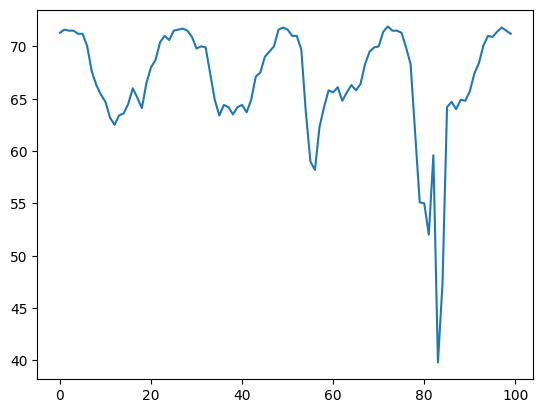

In [9]:
plt.plot(data['VDS_1_Speed (mph)'][:100])

# **Creating Dataset**

In [10]:
from sklearn.preprocessing import MinMaxScaler

sequence_length = 25  # You can adjust this based on your data

# Create sequences and corresponding target values
sequences = []
targets = []

# Initialize scalers for sequences and targets
seq_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

for i in range(len(data) - sequence_length):
    seq = data[['VDS_1_Flow (Veh/Hour)', 'VDS_1_Occupancy (%)']].iloc[i:i+sequence_length].values
    target = data['VDS_1_Speed (mph)'].iloc[i+sequence_length]  # Change 'Vehicles' to 'Speed'
    sequences.append(seq)
    targets.append(target)

# Convert sequences and targets to NumPy arrays
X = np.array(sequences)
y = np.array(targets)

# Fit and transform the data using the scalers
X = seq_scaler.fit_transform(X.reshape(-1, 2)).reshape(X.shape)
y = target_scaler.fit_transform(y.reshape(-1, 1)).reshape(y.shape)

In [11]:
data.info

<bound method DataFrame.info of                      Hour  VDS_1_Speed (mph)  VDS_1_Flow (Veh/Hour)  \
0     2023-07-22 00:00:00               71.3                   1014   
1     2023-07-22 01:00:00               71.6                    648   
2     2023-07-22 02:00:00               71.5                    477   
3     2023-07-22 03:00:00               71.5                    433   
4     2023-07-22 04:00:00               71.2                    485   
...                   ...                ...                    ...   
2202  2023-10-21 18:00:00               61.2                   4883   
2203  2023-10-21 19:00:00               65.3                   3840   
2204  2023-10-21 20:00:00               68.2                   3262   
2205  2023-10-21 21:00:00               68.8                   2785   
2206  2023-10-21 22:00:00               69.1                   2450   

      VDS_1_Occupancy (%)  VDS_2_Speed (mph)  VDS_2_Flow (Veh/Hour)  \
0                     1.2               66.6

# **Train-Test Split**

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **GRU Model**

In [13]:
from tensorflow import keras

model_gru = keras.Sequential([
    # First GRU layer with 256 units and 'relu' activation
    keras.layers.GRU(units=256, activation='relu', return_sequences=True, input_shape=(sequence_length, 2)),

    # Second GRU layer with 128 units and 'relu' activation
    keras.layers.GRU(units=128, activation='relu', return_sequences=True),

    # Additional GRU layers can be added as needed

    # Flatten layer to prepare for Dense layers
    keras.layers.Flatten(),

    # First Dense layer with 64 units and 'relu' activation
    keras.layers.Dense(units=64, activation='relu'),

    # Second Dense layer with 32 units and 'relu' activation
    keras.layers.Dense(units=32, activation='relu'),

    # Output Dense layer with 1 unit (for regression tasks)
    keras.layers.Dense(units=1)
])
# Print the model summary
model_gru.summary()


# Compile the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 25, 256)           199680    
                                                                 
 gru_1 (GRU)                 (None, 25, 128)           148224    
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 64)                204864    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 554,881
Trainable params: 554,881
Non-trai

Epoch 1/100
50/50 [==============================] - 15s 214ms/step - loss: 0.0743 - val_loss: 0.0112
Epoch 2/100
50/50 [==============================] - 6s 116ms/step - loss: 0.0143 - val_loss: 0.0097
Epoch 3/100
50/50 [==============================] - 8s 153ms/step - loss: 0.0125 - val_loss: 0.0085
Epoch 4/100
50/50 [==============================] - 8s 168ms/step - loss: 0.0116 - val_loss: 0.0078
Epoch 5/100
50/50 [==============================] - 6s 118ms/step - loss: 0.0110 - val_loss: 0.0092
Epoch 6/100
50/50 [==============================] - 10s 203ms/step - loss: 0.0093 - val_loss: 0.0062
Epoch 7/100
50/50 [==============================] - 6s 118ms/step - loss: 0.0080 - val_loss: 0.0071
Epoch 8/100
50/50 [==============================] - 7s 148ms/step - loss: 0.0077 - val_loss: 0.0071
Epoch 9/100
50/50 [==============================] - 9s 176ms/step - loss: 0.0074 - val_loss: 0.0047
Epoch 10/100
50/50 [==============================] - 6s 130ms/step - loss: 0.0075 - val_

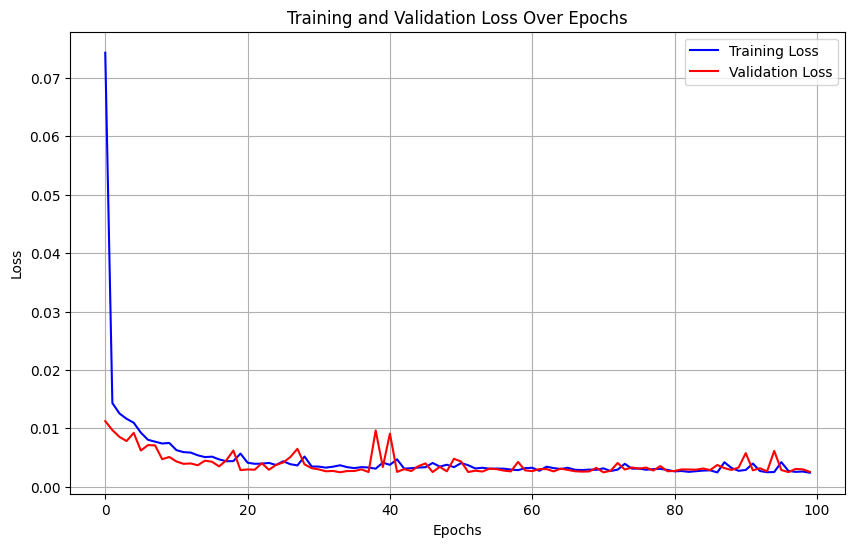

In [15]:
import matplotlib.pyplot as plt

# Train the GRU model and store the history
history = model_gru.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Get the training and validation loss from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# **RNN Model**

In [16]:
from tensorflow import keras

model_rnn = keras.Sequential([
    # First SimpleRNN layer with 256 units and 'relu' activation
    keras.layers.SimpleRNN(units=256, activation='relu', return_sequences=True, input_shape=(sequence_length, 2)),

    # Second SimpleRNN layer with 128 units and 'relu' activation
    keras.layers.SimpleRNN(units=128, activation='relu', return_sequences=True),

    # Additional SimpleRNN layers can be added as needed

    # Flatten layer to prepare for Dense layers
    keras.layers.Flatten(),

    # First Dense layer with 64 units and 'relu' activation
    keras.layers.Dense(units=64, activation='relu'),

    # Second Dense layer with 32 units and 'relu' activation
    keras.layers.Dense(units=32, activation='relu'),

    # Output Dense layer with 1 unit (for regression tasks)
    keras.layers.Dense(units=1)
])

model_rnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 25, 256)           66304     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 25, 128)           49280     
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                204864    
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,561
Trainable params: 322,561
Non-tr

In [17]:
# Compile the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model_rnn.summary()

# Compile the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
history=model_rnn.fit(X_train, y_train, epochs=100, batch_size=32)

# Get the training and validation loss from the history
loss = history.history['loss']


# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color='blue')

plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 25, 256)           66304     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 25, 128)           49280     
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                204864    
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,561
Trainable params: 322,561
Non-tr

KeyError: ignored

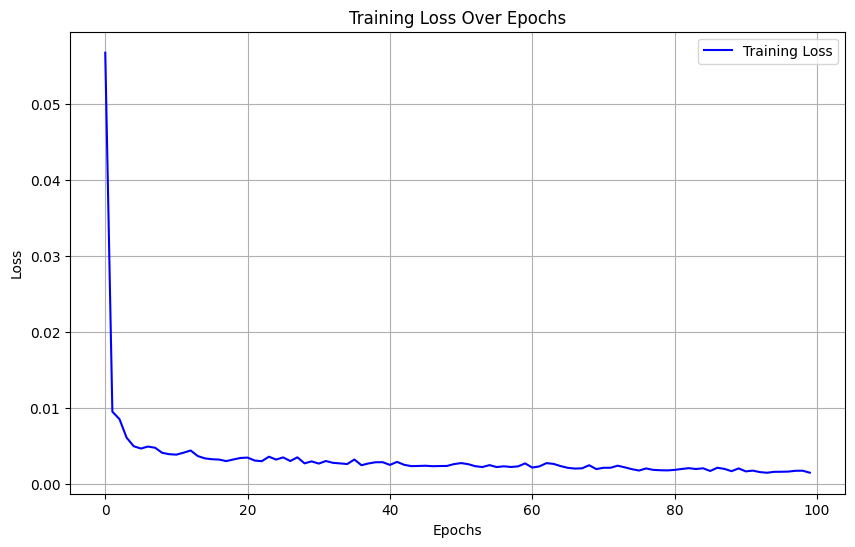

In [18]:
loss = history.history['loss']


# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color='blue')

plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# **LSTM Model**

In [19]:
from tensorflow import keras

model_lstm = keras.Sequential([
    # First LSTM layer with 256 units and 'relu' activation
    keras.layers.LSTM(units=256, activation='relu', return_sequences=True, input_shape=(sequence_length, 2)),

    # Second LSTM layer with 128 units and 'relu' activation
    keras.layers.LSTM(units=128, activation='relu', return_sequences=True),

    # Additional LSTM layers can be added as needed

    # Flatten layer to prepare for Dense layers
    keras.layers.Flatten(),

    # First Dense layer with 64 units and 'relu' activation
    keras.layers.Dense(units=64, activation='relu'),

    # Second Dense layer with 32 units and 'relu' activation
    keras.layers.Dense(units=32, activation='relu'),

    # Output Dense layer with 1 unit (for regression tasks)
    keras.layers.Dense(units=1)
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25, 256)           265216    
                                                                 
 lstm_1 (LSTM)               (None, 25, 128)           197120    
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                204864    
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 669,313
Trainable params: 669,313
Non-tr

Epoch 1/100
50/50 [==============================] - 14s 195ms/step - loss: 0.0830 - val_loss: 0.0134
Epoch 2/100
50/50 [==============================] - 9s 177ms/step - loss: 0.0160 - val_loss: 0.0109
Epoch 3/100
50/50 [==============================] - 11s 222ms/step - loss: 0.0139 - val_loss: 0.0179
Epoch 4/100
50/50 [==============================] - 9s 182ms/step - loss: 0.0142 - val_loss: 0.0101
Epoch 5/100
50/50 [==============================] - 9s 184ms/step - loss: 0.0125 - val_loss: 0.0104
Epoch 6/100
50/50 [==============================] - 9s 178ms/step - loss: 0.0112 - val_loss: 0.0081
Epoch 7/100
50/50 [==============================] - 9s 186ms/step - loss: 0.0108 - val_loss: 0.0083
Epoch 8/100
50/50 [==============================] - 8s 166ms/step - loss: 0.0097 - val_loss: 0.0081
Epoch 9/100
50/50 [==============================] - 10s 203ms/step - loss: 0.0094 - val_loss: 0.0088
Epoch 10/100
50/50 [==============================] - 8s 166ms/step - loss: 0.0098 - val

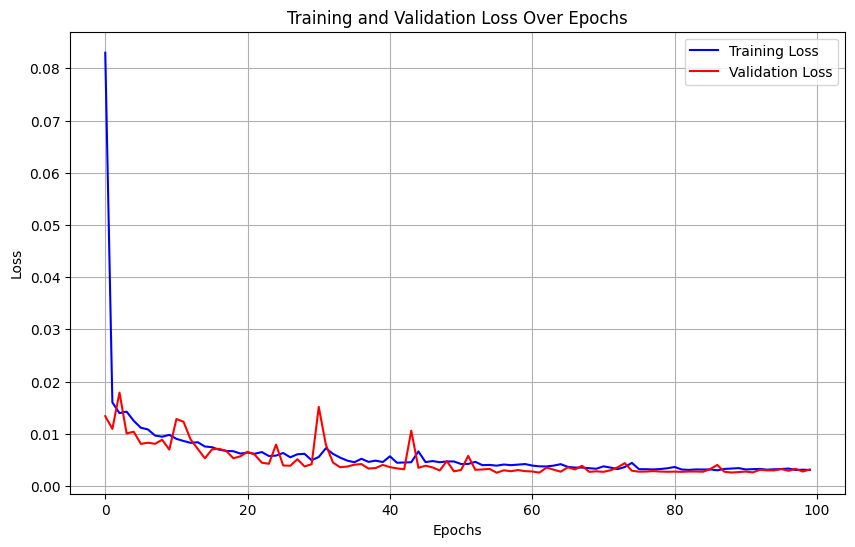

In [20]:
# Train the LSTM model
history=model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)
# Get the training and validation loss from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# **Mean Squared Error**

Mean Squared Error is most reliable metrics which can help us to determine if model is really ok or not

In [22]:
# Make predictions using the test dataset
y_pred_rnn = model_rnn.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)

# Evaluate the models (you can choose different metrics)
from sklearn.metrics import mean_squared_error
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mse_gru = mean_squared_error(y_test, y_pred_gru)

print(f"Mean Squared Error (RNN): {mse_rnn}")
print(f"Mean Squared Error (LSTM): {mse_lstm}")
print(f"Mean Squared Error (GRU): {mse_gru}")

14/14 [==============================] - 0s 34ms/step
Mean Squared Error (RNN): 0.004797698460627787
Mean Squared Error (LSTM): 0.004344397071028173
Mean Squared Error (GRU): 0.004747752872808455


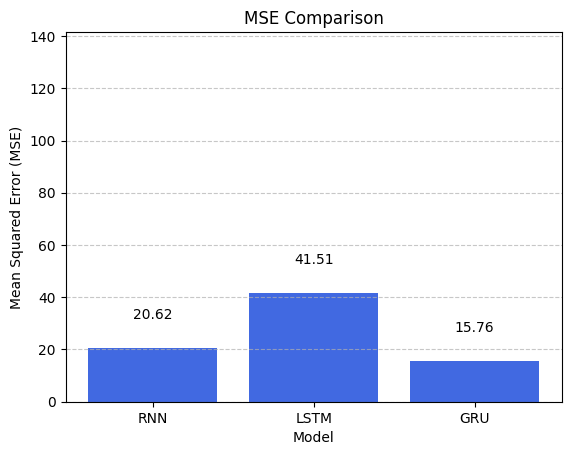

In [29]:
import matplotlib.pyplot as plt

# Mean Squared Error values
mse_values = {
    'RNN': 20.624012286560127,
    'LSTM': 41.51218544979721,
    'GRU': 15.755262226862396
}

# Extract the model names and MSE values
models = list(mse_values.keys())
mse = list(mse_values.values())

# Create a bar graph
plt.bar(models, mse, color='royalblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison')
plt.ylim(0, max(mse) + 100)  # Set the y-axis limit based on the maximum MSE value
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the values on top of each bar
for i, v in enumerate(mse):
    plt.text(i, v + 10, f'{v:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

# **R-Squared Score**

The R-squared metrics ranges between 0 to 1 , 1 means the model is best fit while 0 means worst, clearly seen below here also RNN performs best whith almost 77% accuracy indicating to be best fit, we must note that Time Series data also has a lot of noise suppose there is National Holiday or there is some festival certain days Traffic Flows may be unpredictable

In [28]:
from sklearn.metrics import r2_score

# Calculate R-squared (coefficient of determination)
r2_rnn = r2_score(y_test, y_pred_rnn)
r2_lstm = r2_score(y_test, y_pred_lstm)
r2_gru = r2_score(y_test, y_pred_gru)

print(f"R-squared (RNN): {r2_rnn}")
print(f"R-squared (LSTM): {r2_lstm}")
print(f"R-squared (GRU): {r2_gru}")

R-squared (RNN): 0.767633529287143
R-squared (LSTM): 0.7895882321378748
R-squared (GRU): 0.7700525391654209


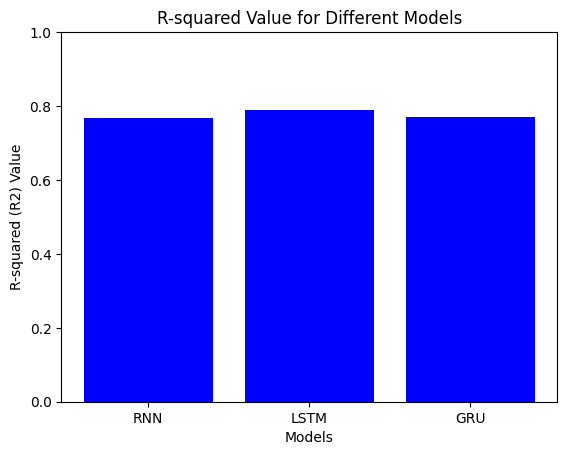

In [29]:
import matplotlib.pyplot as plt

# R-squared values
r2_values = [r2_rnn, r2_lstm, r2_gru]
models = ['RNN', 'LSTM', 'GRU']

# Create a bar chart
plt.bar(models, r2_values, color='blue')
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Value')
plt.title('R-squared Value for Different Models')
plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1
plt.show()

# **Root Mean Squared Error**

In [30]:
import numpy as np

# Calculate the squared differences
squared_diff_rnn = (y_test - y_pred_rnn) ** 2
squared_diff_lstm = (y_test - y_pred_lstm) ** 2
squared_diff_gru = (y_test - y_pred_gru) ** 2

# Calculate the mean squared difference
mse_rnn = np.mean(squared_diff_rnn)
mse_lstm = np.mean(squared_diff_lstm)
mse_gru = np.mean(squared_diff_gru)

# Calculate RMSE
rmse_rnn = np.sqrt(mse_rnn)
rmse_lstm = np.sqrt(mse_lstm)
rmse_gru = np.sqrt(mse_gru)

print(f"Root Mean Squared Error (RNN): {rmse_rnn}")
print(f"Root Mean Squared Error (LSTM): {rmse_lstm}")
print(f"Root Mean Squared Error (GRU): {rmse_gru}")

Root Mean Squared Error (RNN): 0.18863742154339336
Root Mean Squared Error (LSTM): 0.19378936633367227
Root Mean Squared Error (GRU): 0.19082678478001644


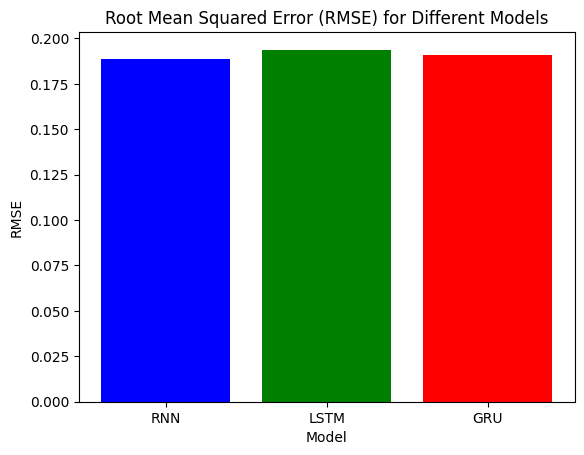

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# RMSE values for each model
rmse_values = [rmse_rnn, rmse_lstm, rmse_gru]
models = ['RNN', 'LSTM', 'GRU']

# Create a bar plot
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) for Different Models')
plt.show()

# **Mean Absolute Error**

In [32]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)

print(f"Mean Absolute Error (RNN): {mae_rnn}")
print(f"Mean Absolute Error (LSTM): {mae_lstm}")
print(f"Mean Absolute Error (GRU): {mae_gru}")

Mean Absolute Error (RNN): 0.032948368621006294
Mean Absolute Error (LSTM): 0.03476550830675663
Mean Absolute Error (GRU): 0.030953689809610607


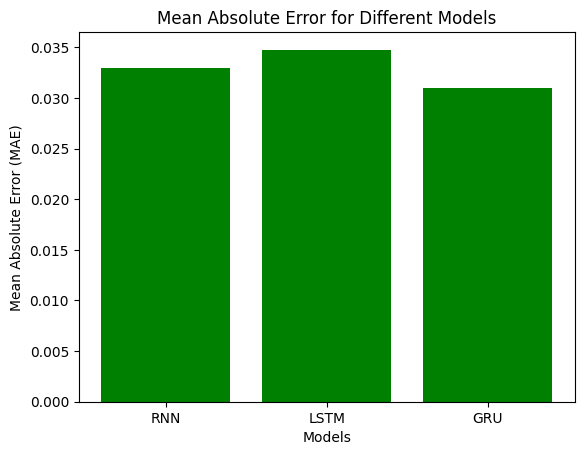

In [33]:
import matplotlib.pyplot as plt

# MAE values
mae_values = [mae_rnn, mae_lstm, mae_gru]
models = ['RNN', 'LSTM', 'GRU']

# Create a bar chart
plt.bar(models, mae_values, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error for Different Models')
plt.show()

# **Predicting the future values**

In [23]:
#what we observe is the timestamps are changing after an hour each so we will do the prediction accordingly
#the task is to predict the speed after 7 days that means we want 168 predictions
# Make predictions using the test dataset
y_pred_rnn = model_rnn.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)

14/14 [==============================] - 0s 34ms/step


In [38]:
#7 days
print("Actual Speed : ", y_test[150])
print("Prediction by RNN : ",y_pred_rnn[150])
print("Prediction by LSTM : ",y_pred_lstm[150])
print("Prediction by GRU : ",y_pred_gru[150])

Actual Speed :  0.9523809523809524
Prediction by RNN :  [0.9648838]
Prediction by LSTM :  [0.95214987]
Prediction by GRU :  [0.9621044]


In [35]:
#3 days
print("Actual Speed : ", y_test[73])
print("Prediction by RNN : ",y_pred_rnn[73])
print("Prediction by LSTM : ",y_pred_lstm[73])
print("Prediction by GRU : ",y_pred_gru[73])

Actual Speed :  0.9891774891774893
Prediction by RNN :  [0.9673559]
Prediction by LSTM :  [0.9233407]
Prediction by GRU :  [1.0551139]


In [36]:
#5 days
print("Actual Speed : ", y_test[120])
print("Prediction by RNN : ",y_pred_rnn[120])
print("Prediction by LSTM : ",y_pred_lstm[120])
print("Prediction by GRU : ",y_pred_gru[120])

Actual Speed :  0.9913419913419913
Prediction by RNN :  [0.96958184]
Prediction by LSTM :  [0.9680738]
Prediction by GRU :  [0.9757631]


Hence we conclude that model gave satisfactory results of predicting next 150 hours that is one week time ,
Hence model is good

# **Conclusion and Findings**

>The data set collected was from PEMS CALTECH website which has collected data
using IOT sensors

>The dataset presented will be used to train a Deep Learning model which aims to estimate the speeds of the vehicles in future

>To estimate the future speeds we have done a train-test split in which train is the values till this date (assume to be in past) and test contains the future values

>The dataset being used for prediction the most appropriate error metrics will be Mean-Squared Error

>We have taken 25 as the sequence length beacaue after every 20 to 25 units of time the sequence of speed repeats itself

>It is interesting to note that the mean-squared error was observed to be minimum in the RNN model while the R-squared score was observed to be best in RNN model

>Overall the RNN model seems to be more suitable in all cases according to findings in this report